<a href="https://colab.research.google.com/github/ahmedlila/Machine-Learning-Course-Implementations/blob/main/Lab%206%20-%20Heart%20Attack%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://zewailcity.edu.eg/main/images/logo3.png) 

_Requirements Solved by_  [**Ahmed Lila - 201800251**](mailto:s-ahmedlila@zewailcity.edu.eg) 


# Lab 6 Task | Logistic Regression

In this task, you'll be working with the heart attack dataset (https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility) 
- Propose at least 2 questions about the dataset. (1 mark)
- Use visualizations and relations between variables to support your analysis in answering these questions. (4 marks)
- Perform any necessary cleaning steps. (2 marks)
- Fit a logistic regression model. (1 mark)
- Report model performance. (0.5 marks)
- Discuss your findings and observations. (1 mark)
- Discuss dataset limitations. (0.5 marks)
- 2 bonus marks for organized notebooks with detailed analysis and logical flow of conclusions. 

## About the data

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

**Attribute Information**
- Age [age]
- Sex [sex]
- Chest pain type (4 values) [cp]
 - Value 1: typical angina (value=3)
 - Value 2: atypical angina
 - Value 3: non-anginal pain
 - Value 4: asymptomatic (normal) [value=0]
- Resting blood pressure [trestbps]
- Serum cholestoral in mg/dl [chol]
- Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) [fbs]
 - In general: A fasting blood sugar level below 100 milligrams per deciliter (mg/dL) — 5.6 millimoles per liter (mmol/L) — is considered normal. A fasting blood sugar level from 100 to 125 mg/dL (5.6 to 7.0 mmol/L ) is considered prediabetes. This result is sometimes called impaired fasting glucose. [Source](https://www.mayoclinic.org/diseases-conditions/prediabetes/diagnosis-treatment/drc-20355284#:~:text=hours%20or%20overnight.-,In%20general%3A,sometimes%20called%20impaired%20fasting%20glucose.)
- Resting electrocardiographic results  [restecg]
 - Value 0: normal
 - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- Maximum heart rate achieved [thalach]
- Exercise induced angina [exang]
- Oldpeak = ST depression induced by exercise relative to rest [oldpeak]
- The slope of the peak exercise ST segment [slope]
 - Value 1: upsloping
 - Value 2: flat
 - Value 3: downsloping
- Number of major vessels (0-3) colored by flourosopy [ca] (normal=3)
- Thal [thal]
 - 0 = normal;
 - 1 = fixed defect;
 - 2 = reversable defect
- Target: 0= less chance of heart attack 1= more chance of heart attack

## Data Analysis Process

![alt text](https://www.researchgate.net/publication/329930775/figure/fig3/AS:873046667710469@1585161954284/The-fundamental-steps-of-the-exploratory-data-analysis-process_W640.jpg) 


After doing feature engineering, we start training our data using different models that are compatible with data

## Import Libraries and Dataset 

In [ ]:
#import needed libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, MultiTaskLassoCV, LassoLarsCV
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, LeaveOneOut
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE


In [ ]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Research Questions: 
- Does heart attack only attack the old people?
- Does having these syndromes (Exercise induced angina - Maximum heart rate achieved - Chest pain - Number of major vessels) means that the person is suffering from heart attack?
- Does heart attack get males more than females?

## Exploratory Data Analysis

### 1) Distinguish Attributes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 2) Missing data and Duplicates

In [ ]:
#check for missing data, duplicates
print('missing values -> {}'.format(df.isna().sum().sum()))
print('duplicate values -> {}'.format(df.duplicated().sum()))

missing values -> 0
duplicate values -> 1


In [ ]:
# Remove Any duplicates or Missing values
#CODE
df.drop_duplicates(inplace=True)
#TEST
print('duplicate values -> {}'.format(df.duplicated().sum()))

duplicate values -> 0


### 3) Univariate Analysis

#### A- Is the data balanced?

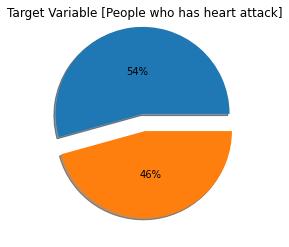

In [ ]:
plt.pie(df['target'].value_counts(), explode = [0.2, 0], shadow = True, autopct='%.0f%%', pctdistance=0.5, labeldistance=1.2)
plt.title('Target Variable [People who has heart attack]')
plt.show() 

*Yes, 54 and 46 makes our data almost balanced*

#### B- Q1: Does heart attack only attack old people?

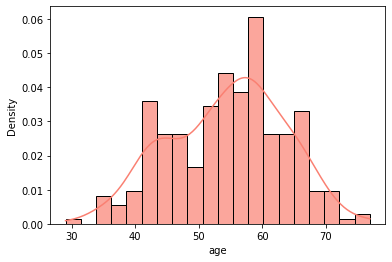

In [ ]:
# Age distribution in dataset
sns.histplot( df['age'],bins=20, color='#FA8072', alpha=0.7,edgecolor='black', linewidth=1, kde=True, stat="density" );

In [ ]:
#Average, Mode, and Median 
print("Mean of age= {}, Median of age= {}, Mode of age= {}" .format(np.round(df['age'].mean(),2), np.round(df['age'].median(),2),int(np.round(df['age'].mode(),2))))

Mean of age= 54.42, Median of age= 55.5, Mode of age= 58


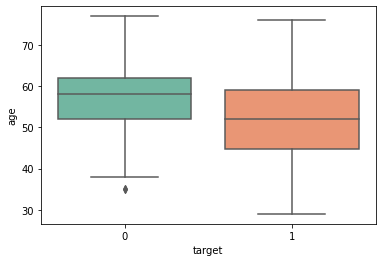

In [ ]:
sns.boxplot(x='target',y='age',data=df, palette='Set2');

From the above plot, it's shown that age has not an effect on having heart attack as they're mutual portion between who have and who haven't 

The age don't necessarily affect people to have heart attack

#### C- Q2: Does heart attack get males more than females?

Males and females distribution

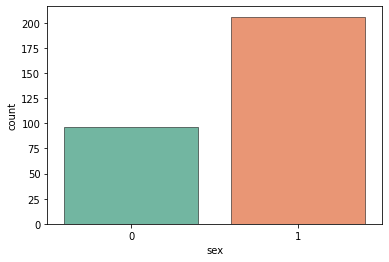

In [ ]:
# the information collected from men are twice information collected from women
sns.countplot(x='sex',data=df, palette='Set2', linewidth=0.5, edgecolor='black');

As we already have collected a biased data to a specific gender, we would try to separate them. Then, We'll try to get each gender as percentage if it has heart attack or not 

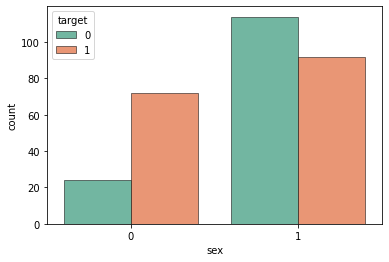

In [ ]:
sns.countplot(x='sex',hue='target',data=df, palette='Set2', linewidth=0.5, edgecolor='black');

In [ ]:
sex_values= df.sex.value_counts()
male_ha= 100*df[df['sex']==1].target.value_counts()/sex_values[1] #Percentage of men who are having heart attack
female_ha= 100*df[df['sex']==0].target.value_counts()/sex_values[0] #Percentage of women who are having heart attack

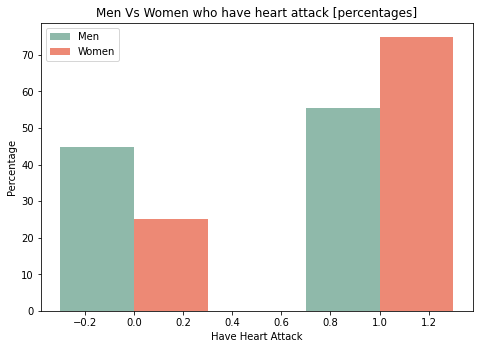

In [ ]:
data = [male_ha, female_ha]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df.target.unique()-0.15, data[0], color = '#8FB9AA', width = 0.3);
ax.bar(df.target.unique()+0.15, data[1], color = '#ED8975', width = 0.3);
ax.legend(['Men', 'Women']);
plt.xlabel('Have Heart Attack')
plt.ylabel('Percentage')
plt.title('Men Vs Women who have heart attack [percentages]')
plt.show()

Observation: Females are susceptible to get a heart attack than males

#### D- Q3: Does having these syndromes (Exercise induced angina - Maximum heart rate achieved - Chest pain - Number of major vessels) means that the person is susceptible to get a heart attack?

In [ ]:
df.exang.value_counts()

0    203
1     99
Name: exang, dtype: int64

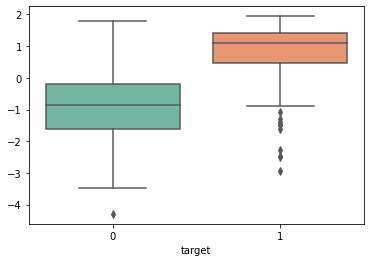

In [ ]:
# Will use this feature later
#Inversely Propotional to (Exercise induced angina - Number of major vessels )
#Propotional to (Maximum heart rate achieved - Chest pain)
heart_syndromes=-df['exang']-df['ca']+(df['cp']/df['cp'].max())+ (df['thalach']/df['thalach'].max())
sns.boxplot(x=df['target'],y=heart_syndromes, palette='Set2');

This box plot shows that gethering those 4 major features is a good indicator, where: 
- The less (excercise exerted - number of major vessels) than normal person,  the person is more susceptible to have a heart attack [Inversely Propotional]
- The more (Maximum heart rate achieved - Chest pain) than normal person,  the person is more susceptible to have a heart attack [Propotional]


## Feature Engineering 

- Feature Selection
 - Identify data attributes
 - Filter irrelevant and redundant attributes
- Feature Creation
 - Existing data points into new features (Making sure to avoid collinearity)
 - Infer new attributes

- Feature Transformation
 - Impute missing feature values: Fortunately, data have no missing values
 - Scale numerical features: there are some features range from 0:155 and others from 0:4, all features don't have same minimum maximum value.

### 1) Feature Selection

In [ ]:
####### Identify data attributes #######
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 45.4 KB


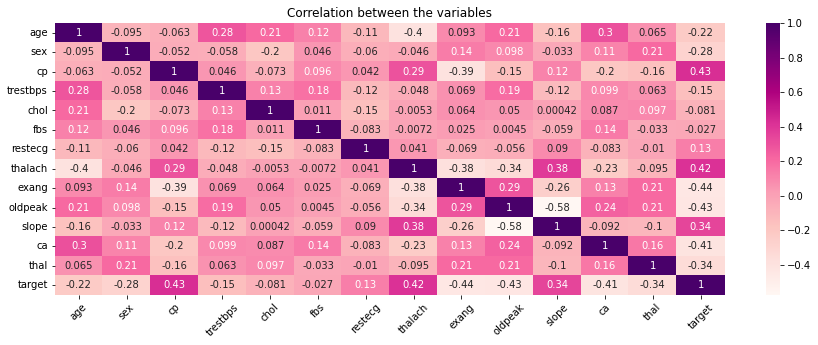

In [ ]:
#heatmap for different features
fig, ax = plt.subplots(figsize=(15,5))         # Sample figsize in inches
sns.heatmap(df.corr(), annot = True, ax=ax, cmap="RdPu");
plt.title('Correlation between the variables')
plt.xticks(rotation=45);

In [ ]:
#CODE
correlation_matrix = df.corr().round(2)
#TEST
correlation_matrix.target.sort_values()

exang      -0.44
oldpeak    -0.43
ca         -0.41
thal       -0.34
sex        -0.28
age        -0.22
trestbps   -0.15
chol       -0.08
fbs        -0.03
restecg     0.13
slope       0.34
thalach     0.42
cp          0.43
target      1.00
Name: target, dtype: float64

In [ ]:
####### Filter irrelevant and redundant attributes #######
# CODE
df.drop(columns=['age',	'sex', 'trestbps',	'chol',	'fbs',	'restecg', 'thal'], inplace=True)
#TEST
df.head()

,cp,thalach,exang,oldpeak,slope,ca,target
0,3,150,0,2.3,0,0,1
1,2,187,0,3.5,0,0,1
2,1,172,0,1.4,2,0,1
3,1,178,0,0.8,2,0,1
4,0,163,1,0.6,2,0,1


## Training/Testing Models

### 1) Train Models on basic data
 [no feature creation or transformation]

In [ ]:
X = df.drop('target',axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, shuffle=True)

#### A- Cross Validation Models


<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" width="500">


In [ ]:
def cross_val_models(X_train, y_train, cv_model):
  cv=5
  if cv_model=='loocv':
    cv=LeaveOneOut()
  ############################## MODELS ##############################
  #I - KNN
  clf = KNeighborsClassifier()
  scores1 = cross_val_score(clf, X_train, y_train, cv=cv) #notice the difference
  avg_score1= np.round(scores1.mean()*100,2)

  #II - DecisionTreeClassifier
  clf = DecisionTreeClassifier()
  scores2 = cross_val_score(clf, X_train, y_train, cv=cv)
  avg_score2= np.round(scores2.mean()*100,2)


  #III - ExtraTreeClassifier
  clf = ExtraTreeClassifier()
  scores4 = cross_val_score(clf, X_train, y_train,cv=cv)
  avg_score4= np.round(scores4.mean()*100,2)

  #IV - LogisticRegression
  clf = LogisticRegression(solver = 'liblinear')
  scores5 = cross_val_score(clf, X_train, y_train, cv=cv)
  avg_score5= np.round(scores5.mean()*100,2)

  #V - RandomForestClassifier
  clf = RandomForestClassifier()
  scores6 = cross_val_score(clf, X_train, y_train,cv=cv)
  avg_score6= np.round(scores6.mean()*100,2)

  ######################### Pretty Table #############################
  data=[['KNeighborsClassifier', avg_score1],['DecisionTreeClassifier', avg_score2],['ExtraTreeClassifier', avg_score4],['LogisticRegression', avg_score5],['RandomForestClassifier', avg_score6]]
  kfolds_models=pd.DataFrame(data,columns=['Model', 'Average Accuracy'])
  return kfolds_models.sort_values(["Average Accuracy"], ascending=False, ignore_index=True)

In [ ]:
# 5 Folds - default
cross_val_models(X_train,y_train, cv_model=5)

,Model,Average Accuracy
0,LogisticRegression,81.73
1,RandomForestClassifier,80.89
2,DecisionTreeClassifier,75.09
3,ExtraTreeClassifier,73.43
4,KNeighborsClassifier,70.10


### 2) Feature Engineering and Retrain data

#### Feature Transformation and Creation

Normalization

In [ ]:
df.columns

Index(['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'target'], dtype='object')

In [ ]:
scaler = preprocessing.MinMaxScaler()
#fit on training only, the min/max here may be the min/max of the whole dataset
scaler.fit(X_train)
X_train_normalized = pd.DataFrame(scaler.transform(X_train), columns=df.columns[0:6])
X_test_normalized =  pd.DataFrame(scaler.transform(X_test), columns=df.columns[0:6])


In [ ]:
#TEST
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train_normalized,y_train)
predictions = model.predict(X_test_normalized)
acc = accuracy_score(y_test, predictions)
print('Accuracy of Logistic Regression = {}%'.format(np.round(acc*100,2)))

Accuracy of Logistic Regression = 77.05%


### 3) Compare Models Accuracy

Adding new features and trying different models accuracy on 1000 iterations

In [ ]:
knn_scores, dtree_scores, extratree_scores, rf_scores, log_scores= [], [], [], [], []
for i in range(1000):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i, shuffle=True)
  #Adding New features: it connects the propotional and inversely propotional indicators in one feature
  X_train['heart_problems']=-X_train['exang']-(X_train['ca']/X_train['ca'].max())-2.5*(X_train['oldpeak']/X_train['oldpeak'].max())+(X_train['cp']/X_train['cp'].max())+(X_train['thalach']/X_train['thalach'].max())+(X_train['slope']/X_train['slope'].max())
  X_test['heart_problems']=-X_test['exang']-(X_test['ca']/X_train['ca'].max())-2.5*(X_test['oldpeak']/X_train['oldpeak'].max())+(X_test['cp']/X_train['cp'].max())+(X_test['thalach']/X_train['thalach'].max())+(X_test['slope']/X_train['slope'].max())
  # To avoid collinearity, we're deleting features that we've used in heart_problem new feature
  collinear_cols=['exang', 'ca','cp', 'slope', 'thalach', 'oldpeak'] 
  X_train.drop(columns=collinear_cols,inplace=True)
  X_test.drop(columns=collinear_cols,inplace=True)
  ####################### MODELS - After Feature Creation #######################
  # I - KNN
  knn = KNeighborsClassifier()
  knn.fit(X_train,y_train)
  predictions = knn.predict(X_test)
  acc = accuracy_score(y_test, predictions)
  knn_score=np.round(acc*100,2)
  knn_scores.append(knn_score)

  # II - DecisionTreeClassifier
  dtree = DecisionTreeClassifier()
  dtree.fit(X_train,y_train)
  predictions = dtree.predict(X_test)
  acc = accuracy_score(y_test, predictions)
  dtree_score=np.round(acc*100,2)
  dtree_scores.append(dtree_score)

  # III - ExtraTreeClassifier
  extratree = ExtraTreeClassifier()
  extratree.fit(X_train,y_train)
  predictions = extratree.predict(X_test)
  acc = accuracy_score(y_test, predictions)
  extratree_score=np.round(acc*100,2)
  extratree_scores.append(extratree_score)

  # IV - RandomForestClassifier
  rf = RandomForestClassifier()
  rf.fit(X_train,y_train)
  predictions = rf.predict(X_test)
  acc = accuracy_score(y_test, predictions)
  rf_score=np.round(acc*100,2)
  rf_scores.append(rf_score)

  # V - Logistic Regression
  log = LogisticRegression(solver = 'liblinear')
  log.fit(X_train,y_train)
  predictions = log.predict(X_test)
  acc = accuracy_score(y_test, predictions)
  log_score=np.round(acc*100,2)
  log_scores.append(log_score)

#### Logistic Regression:

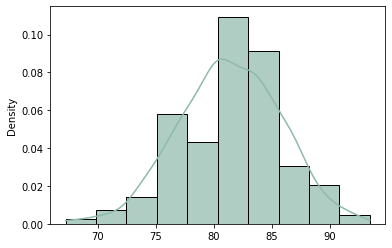

In [ ]:
sns.histplot(log_scores,bins=10, color='#8FB9AA', alpha=0.7,edgecolor='black', linewidth=1, kde=True, stat="density" );

In [ ]:
avg_log=sum(log_scores)/len(log_scores)
print('Accuracy of Logistic Regression (One Feature) of 1000 iterations = {}%'.format(np.round(avg_log,2)))

Accuracy of Logistic Regression (One Feature) of 1000 iterations = 81.36%


#### KNeighborsClassifier:

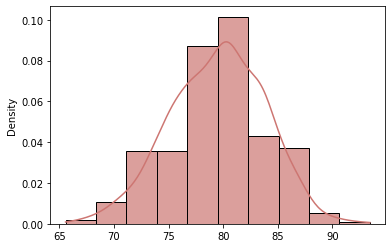

In [ ]:
sns.histplot(knn_scores,bins=10, color='#CD7672', alpha=0.7,edgecolor='black', linewidth=1, kde=True, stat="density" );

In [ ]:
knn_avg= sum(knn_scores)/len(knn_scores)
print('Accuracy of KNeighborsClassifier (One Feature) of 1000 iterations = {}%'.format(np.round(knn_avg,2)))

Accuracy of KNeighborsClassifier (One Feature) of 1000 iterations = 79.5%


#### Decision Tree Classifier:

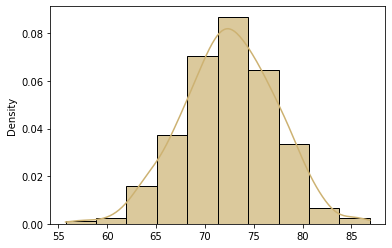

In [ ]:
sns.histplot(dtree_scores,bins=10, color='#CDB272', alpha=0.7,edgecolor='black', linewidth=1, kde=True, stat="density" );

In [ ]:
avg_dtree=sum(dtree_scores)/len(dtree_scores)
print('Accuracy of Decision Tree Classifier (One Feature) of 1000 iterations = {}%'.format(np.round(avg_dtree,2)))

Accuracy of Decision Tree Classifier (One Feature) of 1000 iterations = 72.48%


#### Extra Tree Classifier:

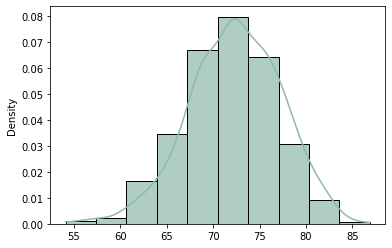

In [ ]:
sns.histplot(extratree_scores,bins=10, color='#8FB9AA', alpha=0.7,edgecolor='black', linewidth=1, kde=True, stat="density" );

In [ ]:
avg_extratree=sum(extratree_scores)/len(extratree_scores)
print('Accuracy of Extra Tree Classifier (One Feature) of 1000 iterations = {}%'.format(np.round(avg_extratree,2)))

Accuracy of Extra Tree Classifier (One Feature) of 1000 iterations = 72.39%


#### Random Forest Classifier:

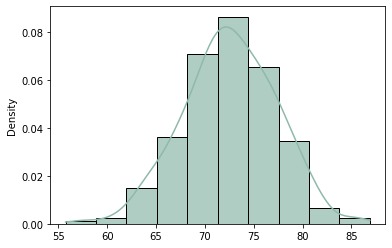

In [ ]:
sns.histplot(rf_scores,bins=10, color='#8FB9AA', alpha=0.7,edgecolor='black', linewidth=1, kde=True, stat="density" );

In [ ]:
avg_rf=sum(rf_scores)/len(rf_scores)
print('Accuracy of Random Forest Classifier (One Feature) of 1000 iterations = {}%'.format(np.round(avg_rf,2)))

Accuracy of Random Forest Classifier (One Feature) of 1000 iterations = 72.56%


## Findings and Observations

#### 1) Research Questions:

- Q1: Does heart attack only attack the old people?
 - there's no obvious relation between getting old and being susceptible to have heart attack
- Q3: Does heart attack get males more than females?
 -  No, according to this dataset ,which is too small, Females are susceptible to get a heart attack than males 
- Does having these syndromes (Exercise induced angina - Maximum heart rate achieved - Chest pain - Number of major vessels) means that the person is suffering from heart attack?
 - Yes, it seems that it's a strong inficator of getting heart attack by the following relation: 
 -- The less (excercise exerted - number of major vessels) than normal person, the person is more susceptible to have a heart attack [Inversely Propotional]
 -- The more (Maximum heart rate achieved - Chest pain) than normal person, the person is more susceptible to have a heart attack [Propotional]

#### 2) Findings:

- Data hadn't any missing values, and there were one duplicate sample which is re,moved in EDA part

**Using only one features in the training data, the accuracy of models on test data (selected randomly) in 1000 iterations are:**
- **Logistic Regression:** 81.36%
- **KNeighborsClassifier:** 79.5% 
- **Decision Tree Classifier:** 72.48%
- **Extra Tree Classifier:** 72.39%
- **Random Forest Classifier:** 72.56%

## Dataset Limitations

- Dataset is too small, accordingly any visual might not represent (or similar to) the population of people 
- Bias in gender, where men samples are almost twice of women samples
- There are another indicators that affect directly or indirectly on getting heart attack, so the major 6 indicators that affect in the data is not efficient to have a good accuracy in predicting.